<a href="https://colab.research.google.com/github/uchaiaye53/test/blob/master/final/cnn_53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/CNN_dataset.zip', 'r') as zipObj:
     zipObj.extractall('dataset')

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/dataset/CNN_dataset')

Found 50000 files belonging to 5 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

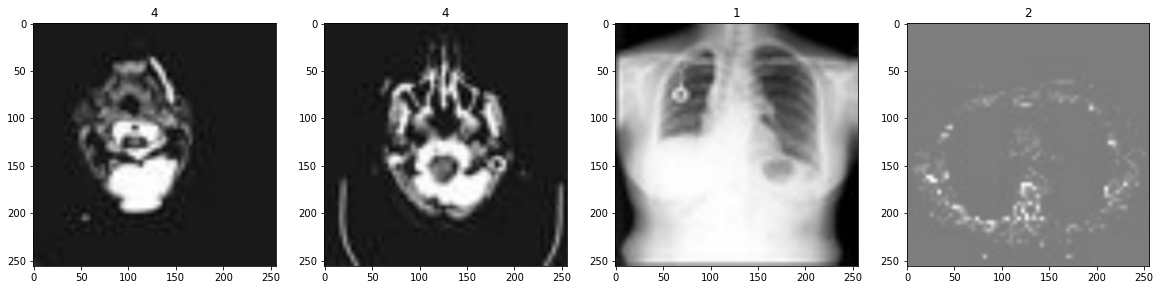

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
data.as_numpy_iterator().next()

(array([[[[4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          ...,
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01]],
 
         [[4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          ...,
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01]],
 
         [[4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          ...,
          [4.9411765e-01, 4.9411765e-01, 4.9411765e-01],
          [4.9411765e-01, 4.9411765e-

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
val_size

312

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
1094/1094 [==============================] - 125s 103ms/step - loss: 0.0697 - accuracy: 0.9795 - val_loss: 0.0058 - val_accuracy: 0.9986
Epoch 2/5
1094/1094 [==============================] - 111s 101ms/step - loss: 0.0257 - accuracy: 0.9943 - val_loss: 0.0060 - val_accuracy: 0.9988
Epoch 3/5
1094/1094 [==============================] - 154s 140ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 4/5
1094/1094 [==============================] - 115s 105ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.0123 - val_accuracy: 0.9976
Epoch 5/5
1094/1094 [==============================] - 115s 105ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 0.9993
